# **DSL 23-2 기초과제 1**
### 기수 : 10 기
### 이름 : 신 재 우

In [2]:
## 코랩에서 작성할 경우
# from google.colab import drive
# drive.mount('/content/drive')

## **3-2.**
신촌 연세로를 지나는 버스 노선의 이용객 수가 ‘차 없는 거리 해제(2022.10.09.)’ 이후 유의미하게 증가했는지 파악하기 위해, 우선 2022년 9월의 평균 이용객 수와 2022년 11월의 평균 이용객 수가 유의미한 차이를 보이는지 통계적 검정을 수행하려고 합니다. 

**(a) ✎ 귀무가설과 대립가설을 설정하시오.**

*정답:* <br>
귀무가설 : 귀무가설이란 어떠한 가설을 내놓았을 때에 그 가설이 기존과 변함이 없다는 가설을 의미한다. 주로 추정량과 실제값이 똑같다는 의미로 사용되고 있다.
<br>위의 예시에서 귀무가설은 -> 2022년도 신촌 연세로를 지나는 버스 노선의 : **9월의 평균 이용객 수 = 11월의 평균 이용객 수**
<br>
대립가설 : 대립가설이란 새로운 사실을 밝히는 것으로 귀무가설과는 대립되는 가설이다. 주로 추정량과 실제값이 똑같지 않다는 의미로 사용되고 있다.
<br>위의 예시에서 대립 가설은 -> 2022년도 신촌 연세로를 지나는 버스 노선의 : **9월의 평균 이용객 수 < 11월의 평균 이용객 수**
<br>차 없는 거리 해제 이후 **유의미하게 증가했는지**를 파악하는 것이기 때문에 해당 부등호를 사용하였다.

**(b) ⓒ 파이썬 scipy의 stats 패키지를 활용하여 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.**

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##### 아래 과정은 전처리 과정입니다. 파일경로만 알맞게 지정해서 실행만 잘 해주시면 데이터프레임이 생성됩니다.

In [21]:
B2212 = pd.read_csv('elementary1_dataset/BUS_STATION_BOARDING_MONTH_202212.csv', encoding = 'cp949')
B2211 = pd.read_csv('elementary1_dataset/BUS_STATION_BOARDING_MONTH_202211.csv', encoding = 'cp949')
B2210 = pd.read_csv('elementary1_dataset/BUS_STATION_BOARDING_MONTH_202210.csv', encoding = 'cp949')
B2209 = pd.read_csv('elementary1_dataset/BUS_STATION_BOARDING_MONTH_202209.csv', encoding = 'cp949')
B2208 = pd.read_csv('elementary1_dataset/BUS_STATION_BOARDING_MONTH_202208.csv', encoding = 'cp949')
B2207 = pd.read_csv('elementary1_dataset/BUS_STATION_BOARDING_MONTH_202207.csv', encoding = 'cp949')

In [22]:
# 13145 정류장(타코벨 앞) 데이터프레임 만드는 함수
def DF13145(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13145']
  return tt

dflist_13145 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['171', '172', '173', '472', '674', '700', '7024', '서대문03', '서대문04', '서대문05']:
    dflist_13145.append(DF13145(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [23]:
# 13146 정류장(유플렉스 앞) 데이터프레임 만드는 함수
def DF13146(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13146']
  return tt

dflist_13146 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['7720', '7727', '7728', '72', '75']:
    dflist_13146.append(DF13146(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [24]:
# 13324 정류장(playground 앞) 데이터프레임 만드는 함수
def DF13324(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13324']
  return tt

dflist_13324 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['171', '172', '173', '472', '674', '700', '7024']:
    dflist_13324.append(DF13324(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

사용일자를 datetime 패키지 사용해서 요일 입력 후, 금~일 제외해서(차 없는 거리 : 금요일 오후 2시부터 일요일 자정까지) df 새로 생성

In [25]:
import datetime
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [26]:
#13145 정류장 정리

for k in range(0,len(dflist_13145)):
  date = []
  for i in range(0,len(dflist_13145[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13145[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13145[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13145[k] = dflist_13145[k][(dflist_13145[k]['요일']!='Fri')&(dflist_13145[k]['요일']!='Sat')&(dflist_13145[k]['요일']!='Sun')]

In [27]:
#13146 정류장 정리

for k in range(0,len(dflist_13146)):
  date = []
  for i in range(0,len(dflist_13146[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13146[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13146[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13146[k] = dflist_13146[k][(dflist_13146[k]['요일']!='Fri')&(dflist_13146[k]['요일']!='Sat')&(dflist_13146[k]['요일']!='Sun')]

In [28]:
#13324 정류장 정리

for k in range(0,len(dflist_13324)):
  date = []
  for i in range(0,len(dflist_13324[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13324[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13324[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13324[k] = dflist_13324[k][(dflist_13324[k]['요일']!='Fri')&(dflist_13324[k]['요일']!='Sat')&(dflist_13324[k]['요일']!='Sun')]

In [29]:
# 데이터프레임 모아서 만들기 - 13145
Data_13145_171 = pd.concat([dflist_13145[0],dflist_13145[10],dflist_13145[20],dflist_13145[30],dflist_13145[40],dflist_13145[50]])
Data_13145_172 = pd.concat([dflist_13145[1],dflist_13145[11],dflist_13145[21],dflist_13145[31],dflist_13145[41],dflist_13145[51]])
Data_13145_173 = pd.concat([dflist_13145[2],dflist_13145[12],dflist_13145[22],dflist_13145[32],dflist_13145[42],dflist_13145[52]])
Data_13145_472 = pd.concat([dflist_13145[3],dflist_13145[13],dflist_13145[23],dflist_13145[33],dflist_13145[43],dflist_13145[53]])
Data_13145_674 = pd.concat([dflist_13145[4],dflist_13145[14],dflist_13145[24],dflist_13145[34],dflist_13145[44],dflist_13145[54]])
Data_13145_700 = pd.concat([dflist_13145[5],dflist_13145[15],dflist_13145[25],dflist_13145[35],dflist_13145[45],dflist_13145[55]])
Data_13145_7024 = pd.concat([dflist_13145[6],dflist_13145[16],dflist_13145[26],dflist_13145[36],dflist_13145[46],dflist_13145[56]])
Data_13145_S03 = pd.concat([dflist_13145[7],dflist_13145[17],dflist_13145[27],dflist_13145[37],dflist_13145[47],dflist_13145[57]])
Data_13145_S04 = pd.concat([dflist_13145[8],dflist_13145[18],dflist_13145[28],dflist_13145[38],dflist_13145[48],dflist_13145[58]])
Data_13145_S05 = pd.concat([dflist_13145[9],dflist_13145[19],dflist_13145[29],dflist_13145[39],dflist_13145[49],dflist_13145[59]])

In [30]:
# 데이터프레임 모아서 만들기 - 13146
Data_13146_7720 = pd.concat([dflist_13146[0],dflist_13146[5],dflist_13146[10],dflist_13146[15],dflist_13146[20],dflist_13146[25]])
Data_13146_7727 = pd.concat([dflist_13146[1],dflist_13146[6],dflist_13146[11],dflist_13146[16],dflist_13146[21],dflist_13146[26]])
Data_13146_7728 = pd.concat([dflist_13146[2],dflist_13146[7],dflist_13146[12],dflist_13146[17],dflist_13146[22],dflist_13146[27]])
Data_13146_72 = pd.concat([dflist_13146[3],dflist_13146[8],dflist_13146[13],dflist_13146[18],dflist_13146[23],dflist_13146[28]])
Data_13146_75 = pd.concat([dflist_13146[4],dflist_13146[9],dflist_13146[14],dflist_13146[19],dflist_13146[24],dflist_13146[29]])

In [31]:
# 데이터프레임 모아서 만들기 - 13324
Data_13324_171 = pd.concat([dflist_13324[0],dflist_13324[7],dflist_13324[14],dflist_13324[21],dflist_13324[28],dflist_13324[35]])
Data_13324_172 = pd.concat([dflist_13324[1],dflist_13324[8],dflist_13324[15],dflist_13324[22],dflist_13324[29],dflist_13324[36]])
Data_13324_173 = pd.concat([dflist_13324[2],dflist_13324[9],dflist_13324[16],dflist_13324[23],dflist_13324[30],dflist_13324[37]])
Data_13324_472 = pd.concat([dflist_13324[3],dflist_13324[10],dflist_13324[17],dflist_13324[24],dflist_13324[31],dflist_13324[38]])
Data_13324_674 = pd.concat([dflist_13324[4],dflist_13324[11],dflist_13324[18],dflist_13324[25],dflist_13324[32],dflist_13324[39]])
Data_13324_700 = pd.concat([dflist_13324[5],dflist_13324[12],dflist_13324[19],dflist_13324[26],dflist_13324[33],dflist_13324[40]])
Data_13324_7024 = pd.concat([dflist_13324[6],dflist_13324[13],dflist_13324[20],dflist_13324[27],dflist_13324[34],dflist_13324[41]])

In [32]:
Data_13145_S03

,요일,사용일자,노선번호,버스정류장ARS번호,승차총승객수,하차총승객수
143555,Mon,20220704,서대문03,13145,609,299
183199,Tue,20220705,서대문03,13145,620,269
222880,Wed,20220706,서대문03,13145,628,246
262331,Thu,20220707,서대문03,13145,582,225
420400,Mon,20220711,서대문03,13145,511,224
...,...,...,...,...,...,...
872132,Thu,20221222,서대문03,13145,702,263
1032129,Mon,20221226,서대문03,13145,637,246
1072463,Tue,20221227,서대문03,13145,632,241
1112864,Wed,20221228,서대문03,13145,679,233


### t검정

#### 13145 정류장

In [46]:
t_13145_takeon = [] # p-value를 저장하는 리스트
for i in range(20,30):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['승차총승객수'], dflist_13145[i+20]['승차총승객수'],
                                    equal_var= False, alternative= "less")
  t_13145_takeon.append(p_value)
t_13145_takeon

[0.009936789348169706,
 0.1730135142378556,
 0.023717269867168808,
 0.9985482758308224,
 0.26580150260063967,
 0.2974943134984972,
 0.005256649293290834,
 0.006804979968439607,
 0.02321185793916975,
 0.7316745090133058]

In [66]:
t_13145_takeoff = [] # p-value를 저장하는 리스트
for i in range(20,30):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['하차총승객수'], dflist_13145[i+20]['하차총승객수'],
                                    equal_var= False, alternative='less')
  t_13145_takeoff.append(p_value)
t_13145_takeoff

[0.35518509301270607,
 0.6227885195011759,
 0.3568332295928345,
 0.4295685560480337,
 0.6465018598321366,
 0.5406279614984912,
 0.38680497492426225,
 0.9225035711073559,
 0.34375471568222826,
 0.8198717977155725]

In [67]:
p_value_13145 = pd.DataFrame({'171' : [t_13145_takeon[0], t_13145_takeoff[0]],
                             '172' : [t_13145_takeon[1], t_13145_takeoff[1]],
                             '173' : [t_13145_takeon[2], t_13145_takeoff[2]],
                             '472' : [t_13145_takeon[3], t_13145_takeoff[3]],
                             '674' : [t_13145_takeon[4], t_13145_takeoff[4]],
                             '700' : [t_13145_takeon[5], t_13145_takeoff[5]],
                             '7024' : [t_13145_takeon[6], t_13145_takeoff[6]],
                             'S03' : [t_13145_takeon[7], t_13145_takeoff[7]],
                             'S04' : [t_13145_takeon[8], t_13145_takeoff[8]],
                             'S05' : [t_13145_takeon[9], t_13145_takeoff[9]]},
                              index = ['take-on', 'take-off'])
p_value_13145

,171,172,173,472,674,700,7024,S03,S04,S05
take-on,0.009937,0.173014,0.023717,0.998548,0.265802,0.297494,0.005257,0.006805,0.023212,0.731675
take-off,0.355185,0.622789,0.356833,0.429569,0.646502,0.540628,0.386805,0.922504,0.343755,0.819872


#### 13146 정류장

In [47]:
t_13146_takeon = [] # p-value를 저장하는 리스트
for i in range(10,15):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['승차총승객수'], dflist_13145[i+10]['승차총승객수'],
                                    equal_var= False, alternative= 'less')
  t_13146_takeon.append(p_value)
t_13146_takeon

[0.43817713587686535,
 0.7807211704498813,
 0.009603593567682311,
 4.999494323764581e-05,
 0.0024555796531708866]

In [48]:
t_13146_takeoff = [] # p-value를 저장하는 리스트
for i in range(10,15):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['하차총승객수'], dflist_13145[i+10]['하차총승객수'],
                                    equal_var=False, alternative='less')
  t_13146_takeoff.append(p_value)
t_13146_takeoff

[0.006957037370316274,
 0.002969129571874814,
 0.010292878418627341,
 0.005736658185704159,
 0.046570559978807366]

In [49]:
p_value_13146 = pd.DataFrame({'7720' : [t_13146_takeon[0], t_13146_takeoff[0]],
                             '7727' : [t_13146_takeon[1], t_13146_takeoff[1]],
                             '7728' : [t_13146_takeon[2], t_13146_takeoff[2]]},
                              index = ['take-on', 'take-off'])
p_value_13146

,7720,7727,7728
take-on,0.438177,0.780721,0.009604
take-off,0.006957,0.002969,0.010293


#### 13324 정류장

In [50]:
t_13324_takeon = [] # p-value를 저장하는 리스트
for i in range(14,21):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['승차총승객수'], dflist_13145[i+14]['승차총승객수'],
                                    equal_var=False, alternative='less')
  t_13324_takeon.append(p_value)
t_13324_takeon

[0.9999998229899965,
 2.68820334707699e-14,
 1.3266937473308896e-06,
 1.0,
 6.391828068315172e-11,
 0.434266923128252,
 0.9999999998839323]

In [51]:
t_13324_takeoff = [] # p-value를 저장하는 리스트
for i in range(14,21):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['하차총승객수'], dflist_13145[i+14]['하차총승객수'],
                                    equal_var=False, alternative='less')
  t_13324_takeoff.append(p_value)
t_13324_takeoff

[6.312085775402079e-07,
 1.4314173560113113e-13,
 5.3969214799698825e-12,
 0.9999999999999607,
 1.826726366581278e-12,
 0.04291943582258167,
 0.9999999999895958]

In [52]:
p_value_13324 = pd.DataFrame({'171' : [t_13324_takeon[0], t_13324_takeoff[0]],
                             '172' : [t_13324_takeon[1], t_13324_takeoff[1]],
                             '173' : [t_13324_takeon[2], t_13324_takeoff[2]],
                             '472' : [t_13324_takeon[3], t_13324_takeoff[3]],
                             '674' : [t_13324_takeon[4], t_13324_takeoff[4]],
                              '700' : [t_13324_takeon[5], t_13324_takeoff[5]],
                              '7024' : [t_13324_takeon[6], t_13324_takeoff[6]]},
                              index = ['take-on', 'take-off'])
p_value_13324

,171,172,173,472,674,700,7024
take-on,9.999998e-01,2.688203e-14,1.326694e-06,1.0,6.391828e-11,0.434267,1.0
take-off,6.312086e-07,1.431417e-13,5.396921e-12,1.0,1.826726e-12,0.042919,1.0


In [53]:
p_value_13145

,171,172,173,472,674,700,7024,S03,S04,S05
take-on,0.009405,0.173168,0.022844,0.999265,0.26342,0.296377,0.004311,0.006468,0.021328,0.731130
take-off,0.352560,0.624311,0.353844,0.428081,0.64765,0.541087,0.386682,0.930200,0.342267,0.825189


In [54]:
p_value_13146

,7720,7727,7728
take-on,0.438177,0.780721,0.009604
take-off,0.006957,0.002969,0.010293


In [55]:
p_value_13324

,171,172,173,472,674,700,7024
take-on,9.999998e-01,2.688203e-14,1.326694e-06,1.0,6.391828e-11,0.434267,1.0
take-off,6.312086e-07,1.431417e-13,5.396921e-12,1.0,1.826726e-12,0.042919,1.0


<t-검정 결과>  
<br>13145 : 유의수준 0.05에 의해서 검정해본 결과 13145 정류장에서는 탑승 시 171, 173, 7024, S03, S04 버스들은 이용 객수가 늘었으며 나머지들은 늘지않았다고 할 수가 있다.
<br>13146 : 유의수준 0.05에 의해서 검정해본 결과 13146 정류장에서는 탑승 시 7728, 하차 시 7720, 7727, 7728 버스들은 이용 객수가 늘었으며 나머지들은 늘지않았다고 할 수가 있다.
<br>13324 : 유의수준 0.05에 의해서 검정해본 결과 13324 정류장에서는 탑승 시 171, 172, 173, 674, 하차 시 171, 172, 173, 674, 700 버스들은 이용 객수가 늘었으며 나머지들은 늘지않았다고 할 수가 있다.

## **4-1.**
(통계학입문(3판) 541쪽 15번 변형) 토플(TOEFL) 점수로 토익(TOEIC) 점수를 예측할 수 있는지 검증해보려고 합니다. 토플과 토익은 미국 교육기업 ETS가 서로 다른 목적으로 개발한 시험이기에 문제 내용과 구성이 다르지만, 두 시험 점수 간의 관련성이 있는 것으로 알려져 있습니다.

**(a)** ⓒ 임의로 선정된 20명의 학생에게 토플과 토익을 모두 치르게 하여 얻은 자료가 있습니다. 파이썬 sklearn.linear_model의 LinearRegression 패키지를 활용하여, 토플 점수로 토익 점수를 예측하는 회귀식을 최소제곱법으로 추정하시오.

In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api

In [6]:
toefl_toeic = pd.read_csv("elementary1_dataset/toefl_toeic.dat", encoding='utf-16', sep='\t')
toefl_toeic = toefl_toeic.set_index('student')
toefl_toeic

,TOEFL,TOEIC
student,,
1,83,840
2,80,720
3,67,605
4,97,780
5,104,920
6,57,585
7,65,645
8,89,670
9,96,770


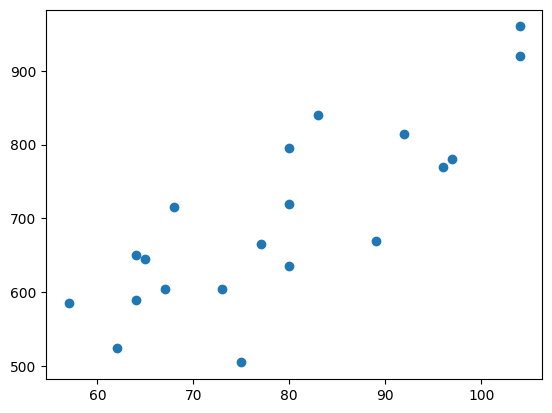

In [7]:
plt.scatter(toefl_toeic["TOEFL"],toefl_toeic["TOEIC"], marker= "o")
plt.show()

In [15]:
toefl_to_toeic = LinearRegression()
toefl_to_toeic.fit(toefl_toeic["TOEFL"].values.reshape((-1, 1)), toefl_toeic["TOEIC"])

LinearRegression()

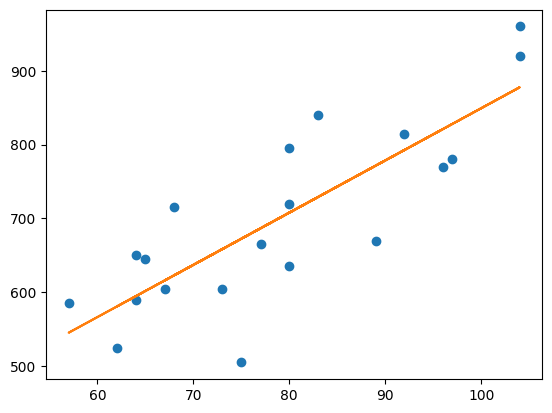

In [21]:
plt.plot(toefl_toeic["TOEFL"],toefl_toeic["TOEIC"], 'o')
plt.plot(toefl_toeic["TOEFL"],toefl_to_toeic.predict(toefl_toeic["TOEFL"].values.reshape(-1,1)))
plt.show()

In [24]:
# 추세선의 기울기와 절편
print(toefl_to_toeic.intercept_, toefl_to_toeic.coef_)

142.31978769068644 [7.06950174]


**(b)** ⓒ 유의수준 5%에서 각 회귀식의 선형성이 있는지 가설검정을 수행하시오.

In [29]:
mod1 = statsmodels.formula.api.ols('TOEIC ~ TOEFL', data=toefl_toeic)
reg_result1 = mod1.fit()
print(reg_result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOEIC   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     35.27
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.28e-05
Time:                        23:01:55   Log-Likelihood:                -113.47
No. Observations:                  20   AIC:                             230.9
Df Residuals:                      18   BIC:                             232.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.3198     95.318      1.493      0.1

## **4-2.**
(통계학입문(3판) 582쪽 19번 변형) 미국 어느 지역의 자동차 판매대수와 광고비, 자동차 전문세일즈맨수, 판매 대리점의 위치 등에 대하여 조사한 자료를 분석하고자 합니다.

ⓒ 파이썬 sklearn.linear_model의 LinearRegression 패키지를 활용하여, Akaike information criterion을 기준으로 아래 모델 중 가장 우수한 모델을 선택하시오.

In [49]:
cars = pd.read_csv("elementary1_dataset/car_sell.dat", encoding='utf-16', sep='\t')
cars

,자동차 판매매수,광고시간(분),세일즈맨(명),도시지역,Unnamed: 4,Unnamed: 5
0,127,18,10,Yes,NaN,NaN
1,138,15,25,No,NaN,NaN
2,159,22,14,Yes,NaN,NaN
3,144,23,12,Yes,NaN,NaN
4,139,17,12,No,NaN,NaN
5,128,16,12,Yes,NaN,NaN
6,161,25,14,Yes,NaN,NaN
7,180,26,17,Yes,NaN,NaN
8,102,15,7,No,NaN,NaN
9,163,24,16,Yes,NaN,NaN


종속변수 : 자동차 판매매수
독립변수들 : 
- 광고시간(분)
- 세일즈맨(명)
- 도시지역

모델들 :
- a : 광고시간(분), 세일즈맨(명), 도시지역
- b : 광고시간(분), 세일즈맨(명)
- c : 광고시간(분), 도시지역
- d : 세일즈맨(명), 도시지역
- e : 광고시간(분)
- f : 세일즈맨(명)

ols 를 바로 돌려본 결과 컬럼명들이 한국어이기 때문에 우선은 영어로 바꾸며 도시지역의 경우 범주형 자료이기 때문에 1과 0으로 수치를 바꾸는 간단한 데이터 전처리를 진행하겠습니다.

In [75]:
cars_new = pd.DataFrame()
cars_new['cars_sold'] = cars['자동차 판매매수']
cars_new['ad_time'] = cars['광고시간(분)']
cars_new['salesmen'] = cars['세일즈맨(명)']
cars_new['city'] = np.where(cars['도시지역'] == 'Yes', 1, 0)
cars_new

,cars_sold,ad_time,salesmen,city
0,127,18,10,1
1,138,15,25,0
2,159,22,14,1
3,144,23,12,1
4,139,17,12,0
5,128,16,12,1
6,161,25,14,1
7,180,26,17,1
8,102,15,7,0
9,163,24,16,1


In [72]:
lst1 = ['Model A', 'Model B', 'Model C', 'Model D', 'Model E', 'Model F']
lst2 = []

mod_a = statsmodels.formula.api.ols('cars_sold ~ ad_time + salesmen + city', data=cars_new)
reg_a = mod_a.fit()
lst2.append(reg_a.aic)

mod_b = statsmodels.formula.api.ols('cars_sold ~ ad_time + salesmen', data=cars_new)
reg_b = mod_b.fit()
lst2.append(reg_b.aic)

mod_c = statsmodels.formula.api.ols('cars_sold ~ ad_time + city', data=cars_new)
reg_c = mod_c.fit()
lst2.append(reg_c.aic)

mod_d = statsmodels.formula.api.ols('cars_sold ~ salesmen + city', data=cars_new)
reg_d = mod_d.fit()
lst2.append(reg_d.aic)

mod_e = statsmodels.formula.api.ols('cars_sold ~ ad_time', data=cars_new)
reg_e = mod_e.fit()
lst2.append(reg_e.aic)

mod_f = statsmodels.formula.api.ols('cars_sold ~ salesmen', data=cars_new)
reg_f = mod_f.fit()
lst2.append(reg_f.aic)

final = {'Models' : lst1, 'AIC' : lst2}
final = pd.DataFrame(final)
final = final.set_index("Models")

In [73]:
final

,AIC
Models,
Model A,91.640641
Model B,91.522009
Model C,101.525032
Model D,100.434742
Model E,99.808533
Model F,108.814069


AIC 란 모델의 효율성, 혹은 그 모델의 질을 수치이며 공식은 다음과 같습니다.
<br>AIC = 2 * k - 2 * ln(Likelihood)
<br>k 는 모델안에 있는 파라미터들을 의미하며 Likelihood 는 모델의 우도함수입니다.
<br>
<br>AIC는 낮을수록 모델이 좋다는 뜻이기 때문에 위의 결과를 통해서 AIC 에 의하면 Model B, 광고시간(분), 세일즈맨(명), 들을 변수로 사용하는 것이 가장 적합하다고 결론지을 수가 있습니다.